Quem é o mais parecido com Jack Nicholson na turma?

In [1]:
#importação de módulos
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn import datasets

Passo 1: importando o Dataset Olivetti Faces
https://scikit-learn.org/0.22/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces

In [2]:
faces = datasets.fetch_olivetti_faces()
X=faces['data'] #os vetores das faces
X.shape,X.max(),X.min() #os 400 vetores têm valores entre 0 e 1 (não 0 e 255)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


((400, 4096), 1.0, 0.0)

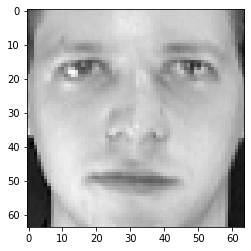

In [3]:
#apresentando a primeira imagem
plt.gray()
plt.imshow(X[0].reshape(64,64)) #para apresentar a foto, o primeiro vetor é transformado em matriz 64 x 64
plt.show()

Passo 2: aplicando o PCA e representando o dataset Olivetti com 128 features

In [16]:
pca = PCA(n_components=128,random_state=42)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=128, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
XN=pca.transform(X) #XN é o dataset nas novas 128 fetures
XN.shape

(400, 128)

Passo 3: ler a foto de Jack Nicholson, transformá-la em 64x64 (tons de cinza) e representá-la como um vetor de 128 componentes (v_jack) em XN

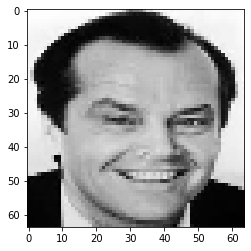

(255, 0)

In [18]:
jack=cv2.imread('jack.jpg')
jack = cv2.cvtColor(jack, cv2.COLOR_BGR2GRAY)
jack=cv2.resize(jack,(64,64))#adaptando o tamnho da imagem em pixels
plt.imshow(jack)
plt.show()
jack.max(),jack.min()#a imagem traz valores entre 0 e 255, vamos trazê-los para o intervalo 0 a 1

In [19]:
jack=jack/255 #dividindo todos os valores por 255
v_jack=jack.reshape(1,4096) #gerando o vetor de 4096 elementos
v_jack=pca.transform(v_jack)#representando a foto de jack no sistema de 128 features
v_jack.shape

(1, 128)

Passo 4: qual das fotos do dataset Olivetti é a mais próxima da do Jack Nicholson?

In [20]:
v_dist=[] #criando uma lista de distâncias entre Jack Nicholson e as outras fotos
for v in XN:
  d=np.linalg.norm(v_jack-v)#distância da foto de Jack a cada foto do dataset
  v_dist.append(d)
v_dist=np.array(v_dist)
pos=np.argmin(v_dist)#posição da foto de menor distância
pos

357

In [ ]:
#apresentando Jack e o mais parecido...lado a lado com subplot

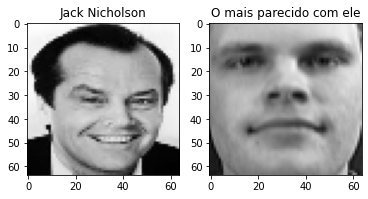

In [21]:

plt.subplot(1,2,1)
plt.title('Jack Nicholson')
plt.imshow(jack)
plt.subplot(1,2,2)
plt.title('O mais parecido com ele')
plt.imshow(X[pos].reshape(64,64))
plt.show()
